<a href="https://colab.research.google.com/github/ProEarth/numerical-analysis/blob/master/Intro_to_Daft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directed Acyclic Graphs

Here are three *Directed Acyclic Graphs* (DAGs) depicting a fascinating story about how we lost the cure to scurvy (
*Scurvy is a disease that leads bleeding gums and poor wound healing. If left untreated, scurvy can be fatal. It was historically common among sailors on long voyages*):

Scurvy was reliably curable in 1747 based on this understanding of the *data generating process* i.e. a model of explaining the observed data on whether sailors got or did not get scurvy:

![](https://raw.githubusercontent.com/flyaflya/persuasive/642288ea5f79050c05801c3d127084ac0f361a01/images/scurvy2.png)

However, over time, a belief - rooted in an old rule of thumb for sailors - led people to believe it was the acid in the lemons that kill the bacteria in the food that led scurvy.  This was the belief that prevailed:

![](https://raw.githubusercontent.com/flyaflya/persuasive/8aaffd0a3c967d0a26f506232f998130847be3e8/images/scurvy.png)

However, sadly that belief led to lemons being replaced by limes (cheaper, but less Vitamin C which proves to be the actual curative treatment) or just using acids like vinegar on food and scurvy returned to sailors on long missions.

In 1928,  we refined our understanding of the scurvy data generating process further:

![](https://raw.githubusercontent.com/flyaflya/persuasive/main/images/scurvy3.png)




Superficially, DAGs are aesthetically pleasing combinations of ellipses, rectangles, and text.  During our course, we will learn they are rigorous representations of data-generating processes that are simultaneously understandable by non-technical stakeholders and rigorously defined so that we can represent data-generating processes in computer code.

For now, we will just learn about Python by drawing superficially pleasing DAGs.

# Packages in Colab

We will use the `daft` package to draw DAGs.  Colab comes preconfigured with lots of great data science packages - `daft` is not one of them.  However, the primary reason we are using Colab is that it greatly simplifies package installation and maintenance for us, sometimes an enormous source of pain.  

![](https://preview.redd.it/2o8wlapqk5h31.png?width=492&format=png&auto=webp&s=aff6c993cdfcceff2080731993ef6ba6ec67af25)

If we were to google "list installed packages python", we would inevitably find this command can help:

```
pip list
```

*([sample instructions from Internet](https://www.activestate.com/resources/quick-reads/how-to-list-installed-python-packages/) )*

Gemini AI is probably even more capable of just getting us the answer we need.

So, let's try `pip list`, but we put an exclamation point in front of it to tell Colab that THIS IS A COMMAND LINE TOOL which we want executed on the operating system.  Skim through ["Data Science at The Command Line"](https://datascienceatthecommandline.com/2e/) to learn more.  Now, we move on to using `pip list`.

In [ ]:
# install daft package
# suppress output using %%capture if you want by uncommenting line
# %%capture
!pip install daft

In [ ]:
!pip list #use ! to run shell commands, i.e. not python, operating system / terminal / shell types of commands
# see here for more info: https://www.reddit.com/r/learnprogramming/comments/6xr0l9/whats_the_difference_between_terminal_shell/

Notice, `daft==0.1.2` is installed.  Great, let's use it!!!

# First Attempt To Use `daft`

In order to use the package, let's find the documentation and try it out!  Below is some sample code from [the `daft` documentation](https://docs.daft-pgm.org/en/latest/examples/classic/):

In [ ]:
import daft

# Instantiate the PGM.
pgm = daft.PGM()

# Hierarchical parameters.
pgm.add_node("alpha", r"$\alpha$", 0.5, 2, fixed=True)
pgm.add_node("beta", r"$\beta$", 1.5, 2)

# Latent variable.
pgm.add_node("w", r"$w_n$", 1, 1)

# Data.
pgm.add_node("x", r"$x_n$", 2, 1, observed=True)

# Add in the edges.
pgm.add_edge("alpha", "beta")
pgm.add_edge("beta", "w")
pgm.add_edge("w", "x")
pgm.add_edge("beta", "x")

# And a plate.
pgm.add_plate([0.5, 0.5, 2, 1], label=r"$n = 1, \cdots, N$", shift=-0.1)

# Render and save.
pgm.render()

You will see the code works!!  Yay.  I am a wizard.
![](https://www.cnet.com/a/img/resize/0165e20206047e2ebe322821b4fea5fdff7f3061/hub/2014/12/01/89601d70-ca65-4dc7-adfe-f6dbd46d05ba/hobbit-lotr-5-armies-gandalf-hat.jpg?auto=webp&fit=crop&height=675&width=1200)

Back to the example code:


In [ ]:
## to get it bigger, change the dpi argument.
## See help documentation here: https://docs.daft-pgm.org/en/latest/api/#the-rendering-context
pgm.render(dpi=300)

My picture does not display the full image.  Something is wrong.  Let's see if AI can help?

In [ ]:
# Render and save.
pgm.render()

# Display the rendered image using IPython.display.Image
from IPython.display import Image
Image(pgm.figure.savefig(format='png', bbox_inches='tight'))

In [ ]:
# the real fix is to add a semi-colon to suppress the text output for matplotlib
pgm.render(dpi=150);

This is very unsatisfying.... AI is wonderful with really popular and mature things, less so with new things that are not represented in the training data and also less so with just thinking logically sometimes.  

**I HATE COMPUTERS RIGHT NOW --- CAN'T THEY JUST DO WHAT I SAY!!!!**

![](https://media.giphy.com/media/3oFzmqXMDtHH8vEVhe/giphy.gif)


In [ ]:
## note, this is an object-oriented workflow
## there is object called pgm
## we can see it of the daft.PGM type(class types are often capitalized)
type(pgm.render(dpi=150))

In [ ]:
# prompt: pgm.render(dpi=150) gives a matplotlib object that is not fully displaying the entire figure in google colab.  Any ideas why?

# ... (Your existing code) ...

# Render and save.
# Instead of pgm.render(), use pgm.figure.savefig() directly to save the figure.
pgm.render(dpi=150)
pgm.figure.savefig('my_dag.png', bbox_inches='tight')

# Display the saved image using IPython.display.Image
from IPython.display import Image
Image('my_dag.png')

# ... (Rest of your code) ...

**I HATE COMPUTERS RIGHT NOW --- CAN'T THEY JUST DO WHAT I SAY!!!!**

![](https://media.giphy.com/media/3oFzmqXMDtHH8vEVhe/giphy.gif)


In [ ]:
## AFTER 16 DAYS AND 5,200 SEARCHES OF THE INTERNET
## I learned to suppress the output using a semi-colon
## and this leads to the proper sizing of the cell
pgm.render(dpi=150);

In [ ]:
# @title Productive Struggle
from IPython.display import YouTubeVideo, display, HTML

video_id = "ykb8h7Wrt2Q"
start_time = 346
width = 800
height = 600

video_html = f"""
<iframe
    width="{width}"
    height="{height}"
    src="https://www.youtube.com/embed/{video_id}?start={start_time}"
    frameborder="0"
    allowfullscreen
>
</iframe>
"""

display(HTML(video_html))

## Tip: Keyboard Shortcuts for Auto-Complete and Comments

You can use auto-complete to see methods by typing `pgm.` and waiting for a pop-up list of methods.  Note: code completions and documentation hints occur automatically while you type.

Use the following keyboard shortcuts:
 - `Ctrl-space` to re-open completions.
 - `Ctrl-shift-space` to re-open parameter hints.

Also,
 - `Ctrl-/` comments and uncomments lines.

In [ ]:
pgm.

# Your Turn To Try To Figure Things Out

Use the documentation available at https://docs.daft-pgm.org/en/latest/api/ to figure out how to reproduce these two images:

![](https://raw.githubusercontent.com/flyaflya/persuasive/main/images/fig-newsvOval-1.png) ![](https://raw.githubusercontent.com/flyaflya/persuasive/main/images/fig-newsvRect-3.png)

In [ ]:
## here is some skeleton code to get started
# Instantiate the PGM.
pgm = daft.PGM()

# Hierarchical parameters.
nodeNameString = "I AM NODE\n" + r"$(N)$"
pgm.add_node(node = "node", content = nodeNameString, x = 0.5, y = 2, scale = 4)
pgm.add_node(node = "node2", content = "Other Node", x = 2.4, y = 2, aspect = 2)

# show pgm
pgm.show()

In [3]:
!pip install daft

TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

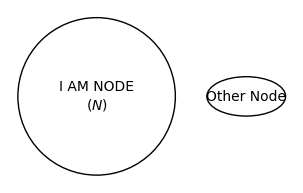

In [4]:
# prompt: !pip install daft

# daft is already installed in the previous code block
# You can directly use it here.

import daft
from IPython.display import Image

# Instantiate the PGM.
pgm = daft.PGM()

# Hierarchical parameters.
nodeNameString = "I AM NODE\n" + r"$(N)$"
pgm.add_node(node="node", content=nodeNameString, x=0.5, y=2, scale=4)
pgm.add_node(node="node2", content="Other Node", x=2.4, y=2, aspect=2)

# show pgm
pgm.render();
Image(pgm.figure.savefig(format='png', bbox_inches='tight'))


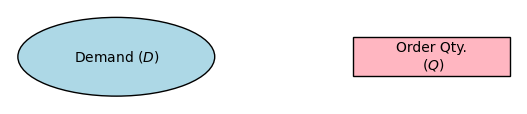

In [21]:
## here is some skeleton code to get started
# Instantiate the PGM.
import daft

pgm = daft.PGM()

# Hierarchical parameters.
# Add "Demand" node (ellipse shape)
pgm.add_node("Demand", "Demand $(D)$", 1, 1, shape="ellipse",aspect=2.5,plot_params={"fc": "lightblue"},scale=2)

# Add "Order Qty." node (rectangle shape)
pgm.add_node("OrderQty", "Order Qty.\n $(Q)$", 5, 1, shape="rectangle",plot_params={"fc": "lightpink"},aspect=4)

# show pgm
pgm.show()